In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels), (test_data,test_labels)= fashion_mnist.load_data()

In [2]:
print(train_data[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [3]:
print(train_labels[0])

9


In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

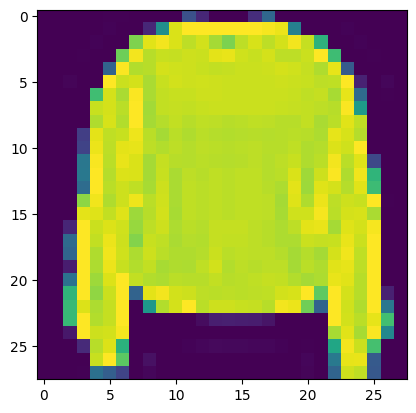

In [5]:
import matplotlib.pyplot as plt
plt.imshow(train_data[7])

In [6]:
train_labels[7]

2

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

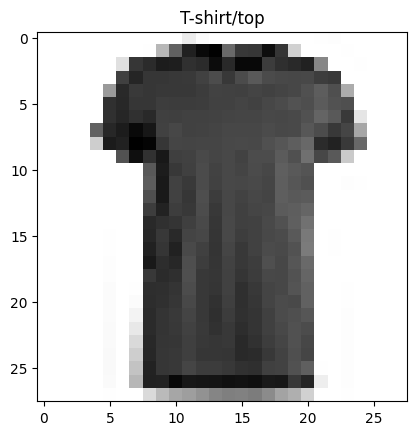

In [8]:
plt.imshow(train_data[17], cmap=plt.cm.binary) 
plt.title(class_names[train_labels[17]])

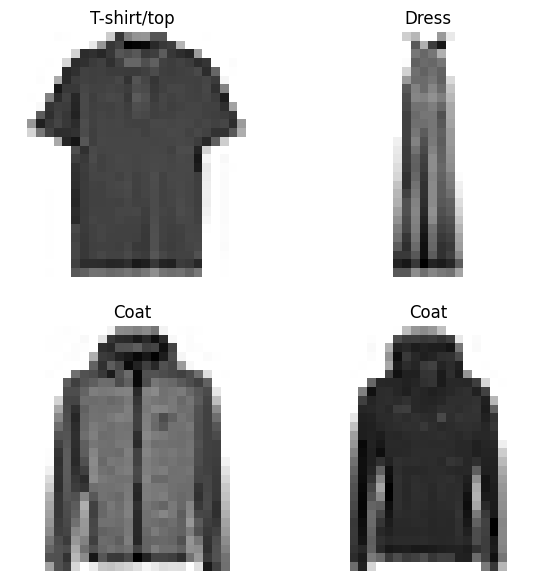

In [9]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

In [10]:
tf.random.set_seed=(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])



model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])


model_history=model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels))  # Corrected typo here


c:\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1517 - loss: 2.7371 - val_accuracy: 0.2436 - val_loss: 1.7674
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2496 - loss: 1.7352 - val_accuracy: 0.2876 - val_loss: 1.6937
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.2800 - loss: 1.6751 - val_accuracy: 0.2853 - val_loss: 1.6388
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3163 - loss: 1.6019 - val_accuracy: 0.3826 - val_loss: 1.5609
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3948 - loss: 1.4824 - val_accuracy: 0.4518 - val_loss: 1.3068
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4465 - loss: 1.2814 - val_accuracy: 0.4531 - val_loss: 1.2571
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4621 - loss: 1.2343 - val_accuracy: 0.4610 - val_loss: 1.2323
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4656 - loss: 1.2191 - 

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [12]:
train_data_norm=train_data/255.0
test_data_norm=test_data/255.0

In [13]:
train_data_norm

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [14]:
tf.random.set_seed=(42)

model_2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")   
])
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_2_history=model_2.fit(train_data_norm,train_labels,epochs=10,validation_data=(test_data_norm,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3959 - loss: 1.6016 - val_accuracy: 0.6617 - val_loss: 0.9259
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6931 - loss: 0.8748 - val_accuracy: 0.7257 - val_loss: 0.7721
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7365 - loss: 0.7510 - val_accuracy: 0.7509 - val_loss: 0.7038
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7674 - loss: 0.6692 - val_accuracy: 0.7753 - val_loss: 0.6614
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7852 - loss: 0.6243 - val_accuracy: 0.7796 - val_loss: 0.6235
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7929 - loss: 0.6019 - val_accuracy: 0.7821 - val_loss: 0.6177
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7991 - loss: 0.5794 - val_accuracy: 0.7898 - val_loss: 0.5981
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8014 - loss: 0.5659 - 

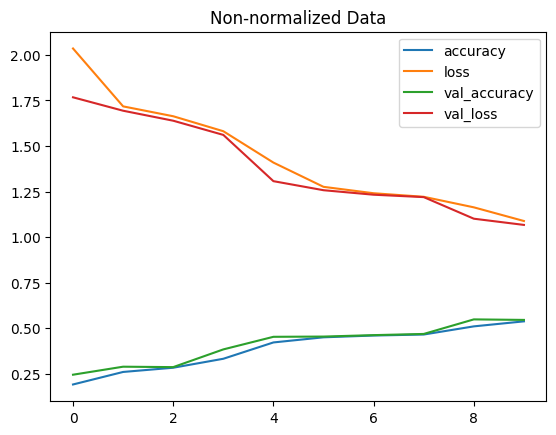

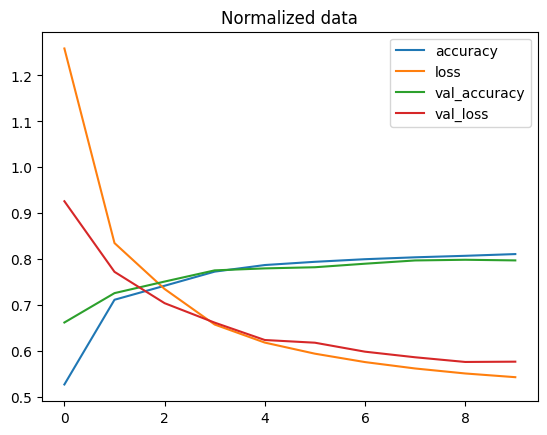

In [15]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(model_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(model_2_history.history).plot(title="Normalized data");

In [32]:
tf.random.set_seed=(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") 
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_3.fit(train_data,
           train_labels,
           epochs=10,
           validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 673us/step - accuracy: 0.1041 - loss: 3.1420 - val_accuracy: 0.1989 - val_loss: 1.8935
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.2230 - loss: 1.8212 - val_accuracy: 0.2851 - val_loss: 1.7058
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.2692 - loss: 1.6927 - val_accuracy: 0.2751 - val_loss: 1.6468
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.2733 - loss: 1.6538 - val_accuracy: 0.2738 - val_loss: 1.6281
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 597us/step - accuracy: 0.2850 - loss: 1.6268 - val_accuracy: 0.2813 - val_loss: 1.6154
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 588us/step - accuracy: 0.2907 - loss: 1.6119 - val_accuracy: 0.3127 - val_loss: 1.6107
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 611us/step - accuracy: 0.2979 - loss: 1.6136 - val_accuracy: 0.3182 - val_loss: 1.5971
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 586us/step - accuracy: 0.3045 -

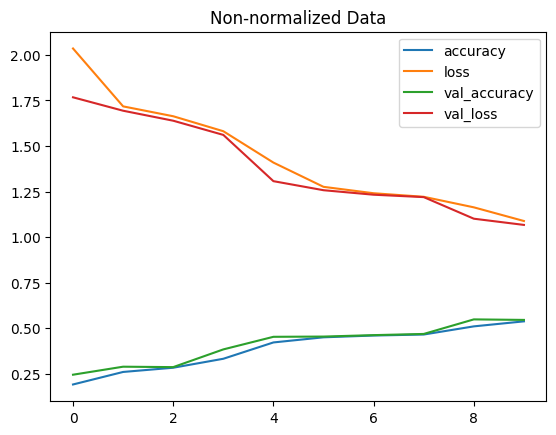

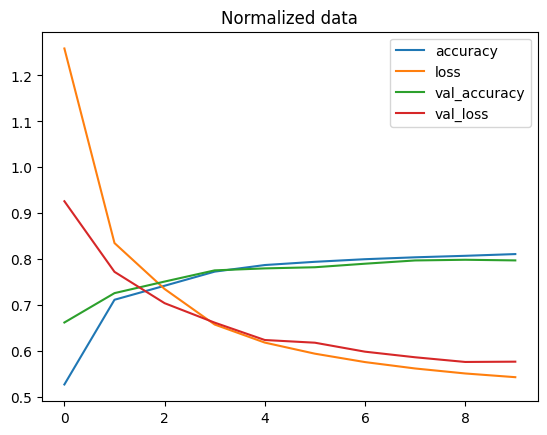

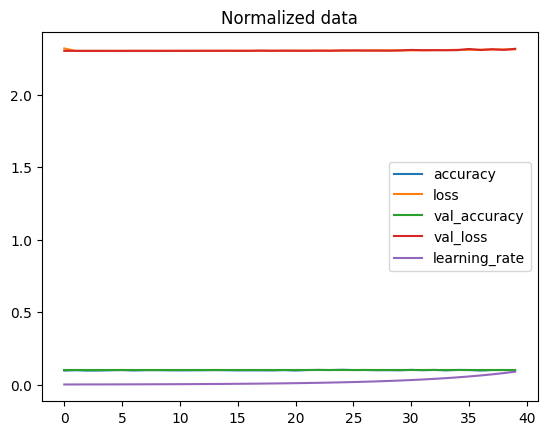

In [17]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(model_history.history).plot(title="Non-normalized Data")
# Plot normalized data loss curves
pd.DataFrame(model_2_history.history).plot(title="Normalized data");
pd.DataFrame(find_lr_history.history).plot(title="Normalized data");

In [33]:
tf.random.set_seed=(42)


model_14 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])


model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])


history = model_14.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 663us/step - accuracy: 0.1125 - loss: 2.3666 - val_accuracy: 0.1628 - val_loss: 2.2782
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.1626 - loss: 2.1460 - val_accuracy: 0.2552 - val_loss: 1.8039
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.3189 - loss: 1.7141 - val_accuracy: 0.3962 - val_loss: 1.5077
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 602us/step - accuracy: 0.4076 - loss: 1.4677 - val_accuracy: 0.4425 - val_loss: 1.3533
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 610us/step - accuracy: 0.4366 - loss: 1.3433 - val_accuracy: 0.4347 - val_loss: 1.3405
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 616us/step - accuracy: 0.4493 - loss: 1.2992 - val_accuracy: 0.4527 - val_loss: 1.2780
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.4547 - loss: 1.2770 - val_accuracy: 0.4553 - val_loss: 1.2638
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 613us/step - accuracy: 0.4556 -

In [34]:

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 
  
  
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [35]:
y_probs = model_14.predict(test_data)

y_probs[:5]
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

y_preds = y_probs.argmax(axis=1)

y_preds[:10]

from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels,
                 y_pred=y_preds)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step


array([[  0,   0,   0, 985,   0,   0,   0,   0,  15,   0],
       [  0,   0,   0, 999,   0,   0,   0,   0,   1,   0],
       [  0,   0,   0, 993,   0,   0,   1,   0,   6,   0],
       [  0,   0,   0, 998,   0,   0,   0,   0,   2,   0],
       [  0,   0,   0, 996,   0,   0,   0,   0,   4,   0],
       [  0,   0,   0,   1,   0, 871,   0,  64,  31,  33],
       [  0,   0,   0, 981,   0,   0,   0,   0,  19,   0],
       [  0,   0,   0,   0,   0,  30,   0, 906,   0,  64],
       [  0,   0,   0,  52,   0,   4,   4,   2, 936,   2],
       [  0,   1,   0,   0,   0,   5,   0,  57,   4, 933]], dtype=int64)

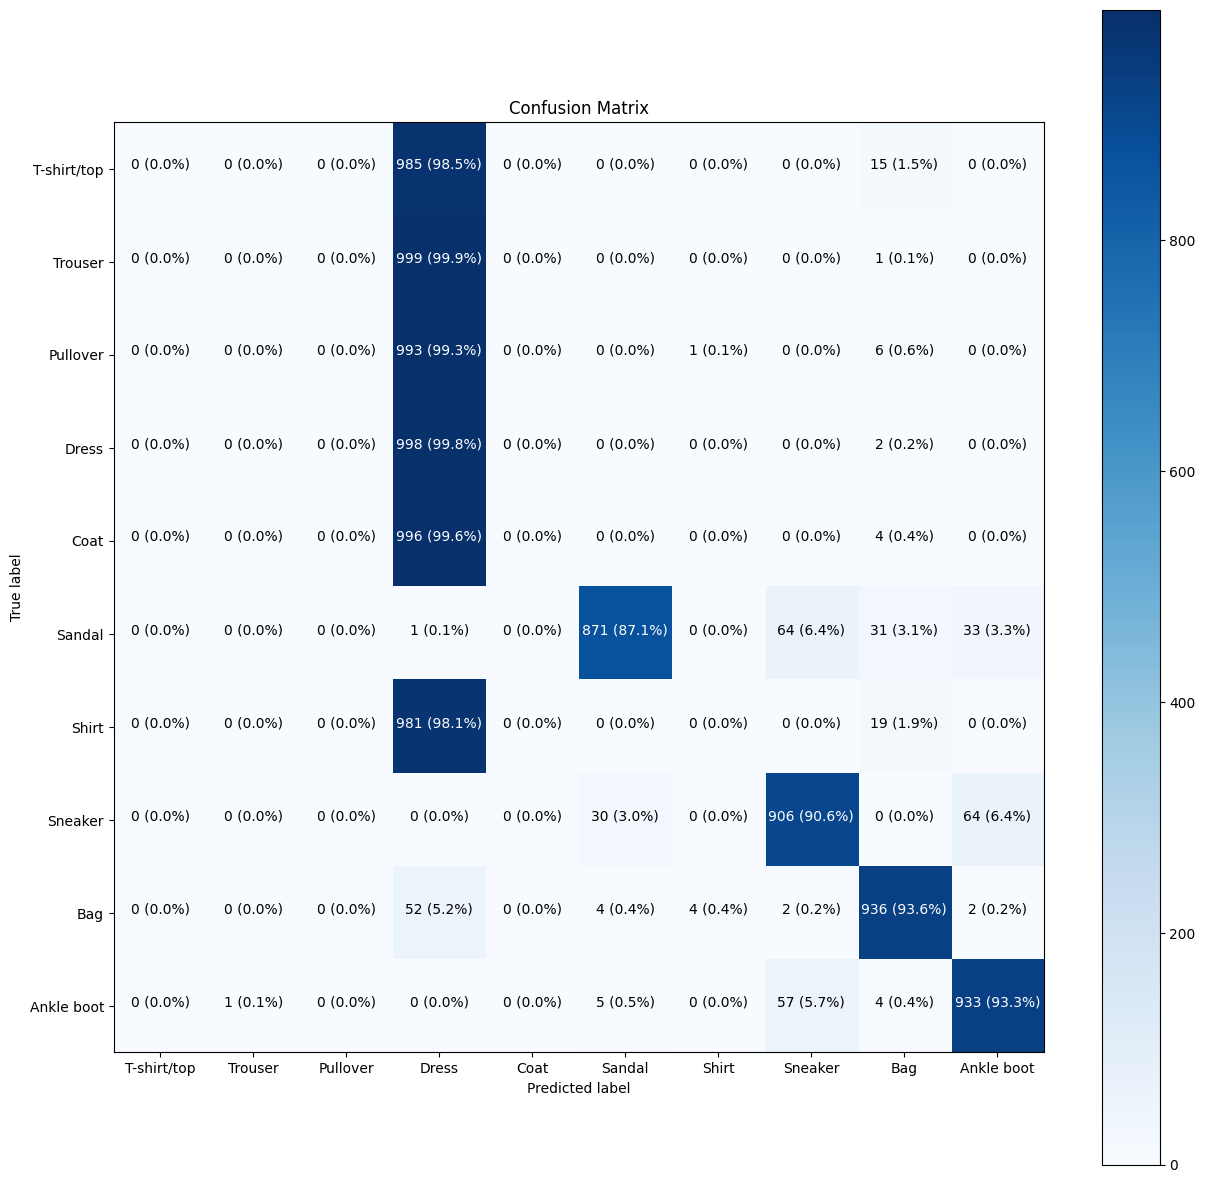

In [36]:
import numpy as np
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)

In [39]:
model_4 = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

c:\python\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model_4.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 30

history = model.fit(train_data,train_labels,
                    epochs = EPOCHS,
                    validation_data=(test_data,test_labels))

Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 621us/step - accuracy: 0.7290 - loss: 0.7404 - val_accuracy: 0.7355 - val_loss: 0.7527
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.7351 - loss: 0.7276 - val_accuracy: 0.7367 - val_loss: 0.7531
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 590us/step - accuracy: 0.7332 - loss: 0.7337 - val_accuracy: 0.7256 - val_loss: 0.7865
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 594us/step - accuracy: 0.7357 - loss: 0.7223 - val_accuracy: 0.7341 - val_loss: 0.7492
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.7407 - loss: 0.7268 - val_accuracy: 0.7329 - val_loss: 0.7525
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 591us/step - accuracy: 0.7346 - loss: 0.7334 - val_accuracy: 0.7236 - val_loss: 0.7524
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.7294 - loss: 0.7457 - val_accuracy: 0.7323 - val_loss: 0.7456
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - accuracy: 0.7309 -

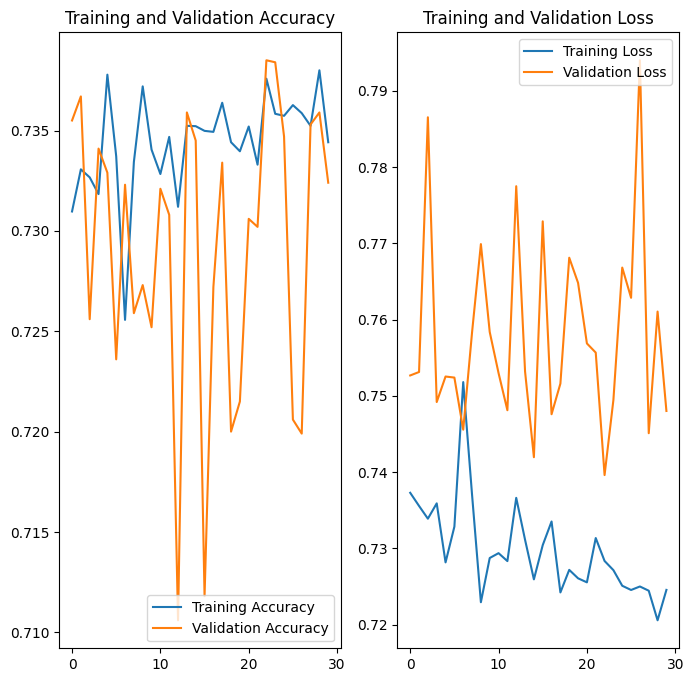

In [44]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

early stopping

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
(train_data,train_labels), (test_data,test_labels)= fashion_mnist.load_data()
model_final = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28,1)),
        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dense(64, activation = 'relu'),
        tf.keras.layers.Dense(10, activation = 'softmax')
])

model_final.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Stop training when there is no improvement in the validation loss for 5 consecutive epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model_final.fit(train_data,train_labels,
                    epochs = 100,
                    validation_data=(test_data,test_labels),
                    callbacks=[early_stopping])

Epoch 1/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7101 - loss: 5.0327 - val_accuracy: 0.8144 - val_loss: 0.5366
Epoch 2/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8276 - loss: 0.4929 - val_accuracy: 0.8215 - val_loss: 0.5253
Epoch 3/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8415 - loss: 0.4402 - val_accuracy: 0.8305 - val_loss: 0.5009
Epoch 4/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8502 - loss: 0.4177 - val_accuracy: 0.8509 - val_loss: 0.4260
Epoch 5/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8598 - loss: 0.3934 - val_accuracy: 0.8375 - val_loss: 0.4532
Epoch 6/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8676 - loss: 0.3678 - val_accuracy: 0.8582 - val_loss: 0.4171
Epoch 7/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8714 - loss: 0.3568 - val_accuracy: 0.8518 - val_loss: 0.4678
Epoch 8/100
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8784 - loss: 0

Text(0.5, 1.0, 'Training and Validation Loss')

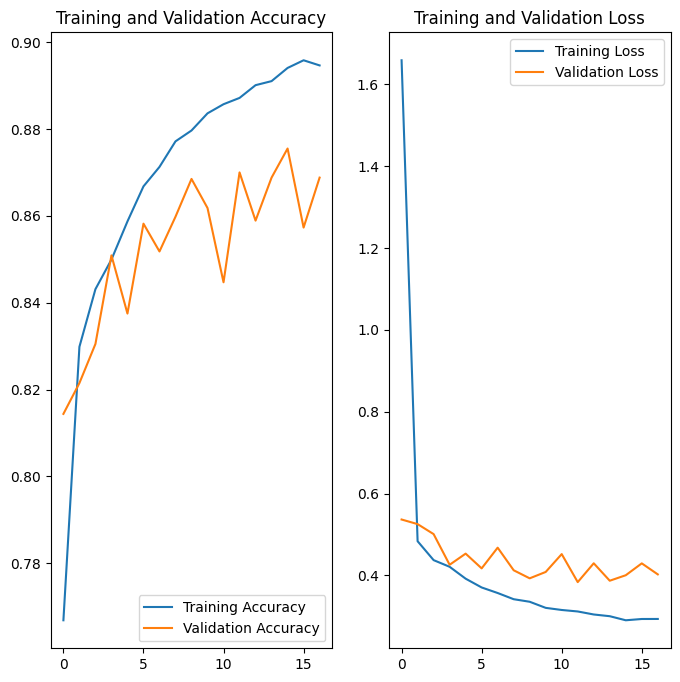

In [7]:
import matplotlib.pyplot as plt
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(len(training_accuracy))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

In [9]:
model_final.save('fashion_model.h5')